In [12]:
import numpy as np

X = np.load("pandas_bears_X.npy")
y = np.load("pandas_bears_y.npy")

bears are labeled 0

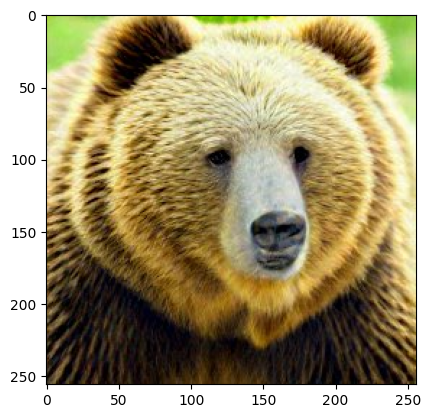

0.0


In [13]:
import matplotlib.pyplot as plt

plt.imshow(X[1].astype(np.int64))
plt.show()

print(y[1])

Pandas are labeled 1

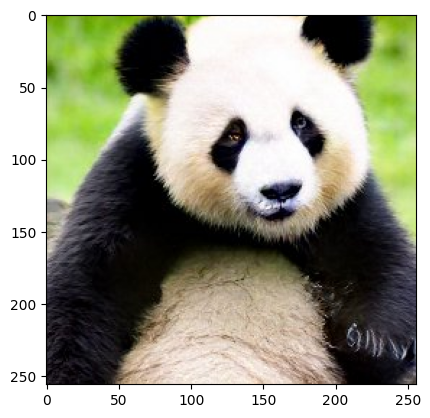

1.0


In [6]:
plt.imshow(X[50].astype(np.int64))
plt.show()

print(y[50])

In [7]:
print(X[1].shape)

(256, 256, 3)


Create and save new array of images with 4 colors per image

In [3]:
from sklearn.cluster import KMeans

for i in range(len(X)):
    image = X[i]

    img = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=4).fit(img)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    X[i] = segmented_img
    print(f'segmenting image {i + 1}')
    
print(X.shape)

In [ ]:
np.save("X_colorsegmented_n=4", X)

Create and save new array of images with 2 colors per image

In [2]:
from sklearn.cluster import KMeans

for i in range(len(X)):
    image = X[i]

    img = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=2).fit(img)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    X[i] = segmented_img
    print(f'segmenting image {i + 1}')
    
print(X.shape)

In [20]:
np.save("X_colorsegmented_n=2", X)

Example of image with 2 colors per image

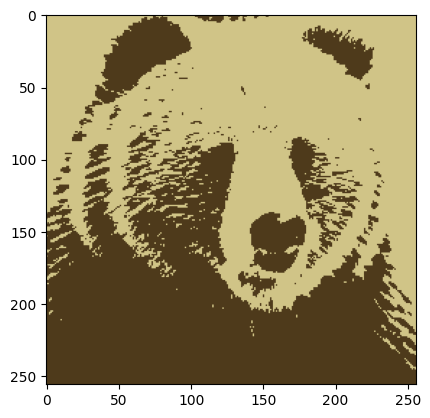

0.0


In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[1].astype(np.int64))
plt.show()

print(y[1])

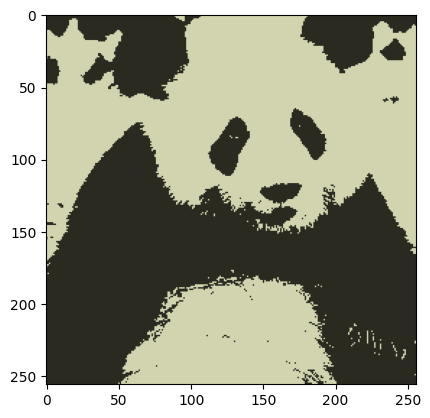

1.0


In [22]:
import matplotlib.pyplot as plt

plt.imshow(X[50].astype(np.int64))
plt.show()

print(y[50])

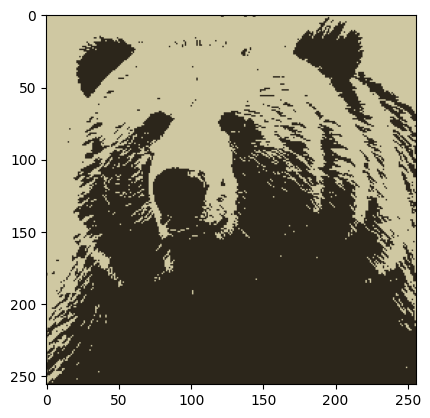

In [23]:
image = X[0]
plt.imshow(image.astype(np.int64))
plt.show()


Create a new array of the means of rgb intensities per image

In [17]:
import numpy as np
import matplotlib.pyplot as plt

rgb_amounts = []
rgb_means = []

for i in range(len(X)):
    img = X[i]
    img = img / 255 #reduce scale to [0, 1]

    # flatten each color channel
    r = img[:, :, 0].flatten()
    g = img[:, :, 1].flatten()
    b = img[:, :, 2].flatten()
    
    rgb_amounts.append([r, g, b])
    
    r_mean = np.mean(r)
    g_mean = np.mean(g)
    b_mean = np.mean(b)
    
    rgb_means.append([r_mean, g_mean, b_mean])
    
rgb_amounts = np.array(rgb_amounts)
rgb_means = np.array(rgb_means)

print(rgb_amounts.shape)
print(rgb_means.shape)

print(rgb_means)

(600, 3, 65536)
(600, 3)
[[0.45046554 0.42301456 0.33508612]
 [0.57246836 0.51044228 0.3273538 ]
 [0.47291966 0.35911805 0.22355754]
 ...
 [0.51211703 0.49056648 0.40029811]
 [0.49081965 0.46352748 0.39436855]
 [0.46741536 0.5078356  0.43770925]]


In [19]:
np.save('rgb_means_n=2', rgb_means)
np.save('rgb_amounts_n=2', rgb_amounts)

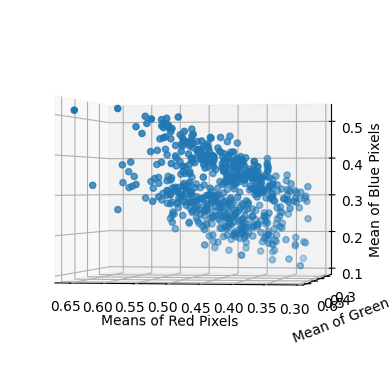

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(rgb_means[:, 0], rgb_means[:, 1], rgb_means[:, 2])

ax.set_xlabel("Means of Red Pixels")
ax.set_ylabel('Mean of Green Pixels')
ax.set_zlabel('Mean of Blue Pixels')

ax.view_init(0, 100)


plt.show()


Do the same thing for the images segmented into 4 colors

In [59]:
X_n4 = np.load("X_colorsegmented_n=4.npy")

In [60]:
import numpy as np
import matplotlib.pyplot as plt

rgb_amounts = []
rgb_means = []

for i in range(len(X_n4)):
    img = X_n4[i]
    img = img / 255 #reduce scale to [0, 1]

    # flatten each color channel
    r = img[:, :, 0].flatten()
    g = img[:, :, 1].flatten()
    b = img[:, :, 2].flatten()
    
    rgb_amounts.append([r, g, b])
    
    r_mean = np.mean(r)
    g_mean = np.mean(g)
    b_mean = np.mean(b)
    
    rgb_means.append([r_mean, g_mean, b_mean])
    
rgb_amounts = np.array(rgb_amounts)
rgb_means = np.array(rgb_means)

print(rgb_amounts.shape)
print(rgb_means.shape)

print(rgb_means)

(600, 3, 65536)
(600, 3)
[[0.45031038 0.42496541 0.33674717]
 [0.57232163 0.51094013 0.32927677]
 [0.47313807 0.35691319 0.22336001]
 ...
 [0.51225592 0.48856189 0.40040116]
 [0.49089098 0.46245823 0.39334352]
 [0.46945735 0.50719437 0.43991801]]


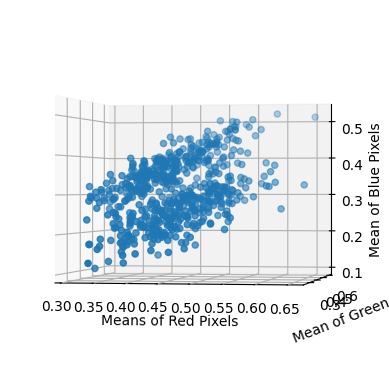

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(rgb_means[:, 0], rgb_means[:, 1], rgb_means[:, 2])

ax.set_xlabel("Means of Red Pixels")
ax.set_ylabel('Mean of Green Pixels')
ax.set_zlabel('Mean of Blue Pixels')

ax.view_init(0, 6400)

plt.show()
